# 1. Linear regression
- Compute the coefficients for the linear regression using least squares estimate (LSE)

In [1]:
import numpy as np
from scipy import linalg

## 1.1.1 LSE 

In [5]:
x=np.array([[-2,-5,-3,0,-6,-2,1,5,-1,3]]).T
x_norm=(x-x.mean())/x.std()

y=np.array([[1,-4,1,3,11,5,0,-1,-3,1]]).T

In [6]:
bias=np.array([[1]*10]).T

In [7]:
X=np.hstack([bias,x_norm])

In [8]:
X

array([[ 1.        , -0.31008684],
       [ 1.        , -1.24034735],
       [ 1.        , -0.62017367],
       [ 1.        ,  0.31008684],
       [ 1.        , -1.55043418],
       [ 1.        , -0.31008684],
       [ 1.        ,  0.62017367],
       [ 1.        ,  1.86052102],
       [ 1.        ,  0.        ],
       [ 1.        ,  1.24034735]])

In [9]:
x_T_x_inv=linalg.inv(np.dot(X.T,X))
ethta_close=x_T_x_inv@np.dot(X.T,y)

In [10]:
ethta_close

array([[ 1.4       ],
       [-1.42639945]])

## 1.1.2 sklearn

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lr=LinearRegression()

In [13]:
lr.fit(X,y)

LinearRegression()

In [14]:
lr.coef_

array([[ 0.        , -1.42639945]])

In [15]:
lr.intercept_

array([1.4])

## 1.2 Gradient

In [24]:
import matplotlib.pyplot as plt

In [20]:
# What is the gradient with respect to x? Show your work to support your answer.
g=(x-1)**4
g_grad=4*(x-1)**3
x=1 # is the minima since x<1,g_grad<0;x>1,g_grad>0

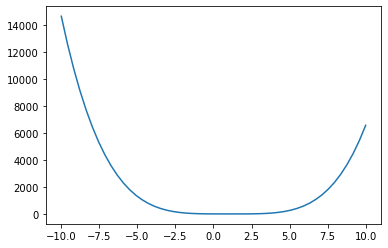

In [21]:
x=np.linspace(-10,10,50)
plt.plot(x,g)

## 2. Closed Form linear regression

In [4]:
import pandas as pd

In [58]:
df=pd.read_csv('x06Simple.csv')
df.drop('Index',axis=1,inplace=True)

In [59]:
raw_data=df.values

#### Q1. How to properly do permutation

In [60]:
np.random.seed(0)
shuffle_idx=np.random.permutation(len(raw_data))
shuffled_data=raw_data[shuffle_idx]

In [61]:
training=shuffled_data[:round(len(raw_data)*2/3)]
testing=shuffled_data[round(len(raw_data)*2/3):]

In [62]:
x_training_raw=training[:,:2]
x_testing_raw=testing[:,:2]

#### Q2. Mean values of columns of a matrix
- split the data firtst
- use training mean/std to standardize testing

In [63]:

x_training_norm=(x_training_raw-x_training_raw.mean(axis=0))/x_training_raw.std(axis=0)
bias_training=np.array([[1]*len(x_training_norm)]).T

x_training=np.hstack([bias_training,x_training_norm])

x_testing_norm=(x_testing_raw-x_training_raw.mean(axis=0))/x_training_raw.std(axis=0)
bias_testing=np.array([[1]*len(x_testing_norm)]).T
x_testing=np.hstack([bias_testing,x_testing_norm])

In [64]:
y_training=training[:,-1]
y_testing=testing[:,-1]

In [65]:
## closed solution of the linear regression
x_T_x_inv=linalg.inv(np.dot(x_training.T,x_training))
ethta=x_T_x_inv@np.dot(x_training.T,y_training)

In [66]:
ethta

array([3343.27586207, 1018.60043916, -290.52614155])

In [67]:
y_pre=np.dot(x_testing,ethta)

#### Q3. Defination of RMSE

In [57]:
RMSE=np.linalg.norm(y_pre-y_testing)/np.sqrt(len(y_pre))

In [58]:
RMSE

653.7601025967209

## 3. S-Folds Cross-Validation

In [104]:
from sklearn.model_selection import KFold

In [143]:
def s_fold(s,data,i):
    kf = KFold(n_splits=s,shuffle=True,random_state=i)
    split=kf.split(data)
    return split

In [115]:
def preprocess(data,train_inx,test_inx):
    x=data[:,:-1]
    y=data[:,-1]
    x_train,y_train=x[train_inx],y[train_inx]
    x_test,y_test=x[test_inx],y[test_inx]
    
    mean=x_train.mean(axis=0)
    std=x_train.std(axis=0)
    
    x_train_norm=(x_train-mean)/std
    x_train_bias=np.c_[np.ones((len(x_train_norm),1)),x_train_norm]
    
    x_test_norm=(x_test-mean)/std
    x_test_bias=np.c_[np.ones((len(x_test_norm),1)),x_test_norm]
    
    return x_train_bias,x_test_bias,y_train,y_test
    
    
    

In [116]:
def lr(data,train_inx,test_inx):
    x_train_bias,x_test_bias,y_train,y_test=preprocess(data,train_inx,test_inx)
    x_T_x_inv=linalg.inv(np.dot(x_train_bias.T,x_train_bias))
    ethta=x_T_x_inv@np.dot(x_train_bias.T,y_train)
    
    y_pre=np.dot(x_test_bias,ethta)
    RMSE=np.linalg.norm(y_pre-y_test)/np.sqrt(len(y_pre))
    return RMSE
    

In [144]:
def fitting(fold_n,data):
    RMSE=[]
    for i in range(20):
        folds=s_fold(fold_n,data,i)
        for training ,testing in folds:
            RMSE.append(lr(data,training,testing))
    return np.array(RMSE)

In [147]:
## Split the data
folds=[3,5,20,len(raw_data)]
RM={}
for n in folds:
    RMSE=fitting(n,raw_data,)
    RM[str(n)+' folds mean']=RMSE.mean()
    RM[str(n)+' folds std']=RMSE.std()

In [148]:
RM

{'3 folds mean': 631.4717925250476,
 '3 folds std': 96.87127472316996,
 '5 folds mean': 612.8558982035155,
 '5 folds std': 134.74324240615724,
 '20 folds mean': 551.7659454590648,
 '20 folds std': 277.59366236734184,
 '44 folds mean': 493.47325987665596,
 '44 folds std': 380.94370889491137}

## 4. Locally weighted Lr

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
def norm_bias(data,test_size):
    x=data[:,:-1]
    y=data[:,-1]
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=test_size,random_state=1)
    
    mean=x_train.mean(axis=0)
    std=x_train.std(axis=0)
    
    
    x_train_norm=(x_train-mean)/std
    x_train_bias=np.c_[np.ones((len(x_train_norm),1)),x_train_norm]
    
    x_test_norm=(x_test-mean)/std
    x_test_bias=np.c_[np.ones((len(x_test_norm),1)),x_test_norm]
    
    return x_train_bias,x_test_bias,y_train,y_test


    

In [54]:

x_train,x_test,y_train,y_test=norm_bias(raw_data,test_size=0.33)

RSE=[]
k=1
i=0
for query_point in x_test:
    d=np.linalg.norm((x_train-query_point),axis=1)
    weights=np.exp(-(d**2)/(k**2))
    weights_matrix=np.diag(weights)
    
    x_T_w_x=np.dot(np.dot(x_train.T,weights_matrix),x_train)
    
    
    ethta=np.linalg.inv(x_T_w_x)@x_train.T@weights_matrix@y_train
    
    y_pre=np.dot(ethta,query_point)
    
    RSE.append((y_pre-y_test[i])**2)
    i=i+1







In [55]:
RMSE=np.sqrt(sum(RSE)/len(RSE))

In [56]:
RMSE

312.097711347849

In [57]:
ethta

array([ 4.38974627e+03,  1.30257355e+00, -6.35586985e+02])

## 5. Gradient descent

In [36]:
x_train,x_test,y_train,y_test=norm_bias(raw_data,test_size=0.33)

In [29]:
np.dot(x_train,ethta)-y_train

array([-4519.3057159 , -2140.31315938, -3039.29757277, -3110.08369212,
       -2140.57519916, -2805.32944564, -4598.56031221, -3029.55146942,
       -3920.06740586, -3919.81350921, -3019.80536608, -4598.80606573,
       -4494.31385903, -2890.32130251, -3934.57589882, -4514.55961255,
       -2110.58334229, -4464.32200216, -3255.78977947, -1315.8272466 ,
       -4014.82165234,  -621.08114325, -3255.07554899, -3534.82979547,
        -626.07300012, -4568.81420886, -4529.06810551, -1215.81910347,
       -2710.05926273])

In [27]:
2*np.dot(x_train.T,(np.dot(x_train,ethta)-y_train))

array([-185794.88755529,  -60321.40721501,    5751.23771177])

In [68]:
x_one=x_train[1]
y_one=y_train[1]
2*np.dot(x_one.T,(np.dot(x_one,ethta)-y_one))

array([ 98.86420101, -69.35030738, 149.49975859])

In [ ]:
def cost_func(y_pre,y):
    return np.sqrt(np.sum((y_pre-y)**2)/len(y))

In [45]:
def gd(x_train,x_test,y_train,y_test,n_iter=1000):

    
    ethta_init=np.random.rand(3)
    ethta=ethta_init*2-1
    
    iter_cur=1
    rmse_cur=100
    rmse_diff=1
    
    lrate=0.01
    RMSE_train=[]
    RMSE_test=[]
    
    while iter_cur< n_iter and rmse_diff>2e-23:
    
        gradient=2*np.dot(x_train.T,(np.dot(x_train,ethta)-y_train))
        ethta=ethta-gradient*lrate/len(x_train)
        
        
        y_pre=np.dot(x_train,ethta)
        rmse_train=np.sqrt(np.sum((y_pre-y_train)**2)/len(y_train))
        
        RMSE_train.append(rmse_train)       
        rmse_diff=abs(rmse_train-rmse_cur)
        rmse_cur=rmse_train
        
        y_pre_test=np.dot(x_test,ethta)
        rmse_test=np.sqrt(np.sum((y_pre_test-y_test)**2)/len(y_pre_test))
        
        RMSE_test.append(rmse_test)
        iter_cur+=1
        

    return RMSE_test,ethta
   

In [46]:
rmse,ethta=gd(x_train,x_test,y_train,y_test)

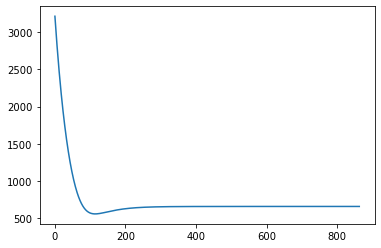

In [48]:
plt.plot(rmse)

In [49]:
ethta

array([3203.51715726, 1041.56756397, -107.41799857])